In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [27]:
dengue = pd.read_csv('datasets//dengue.csv')

In [28]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


<h1>Bar Plot</h1>

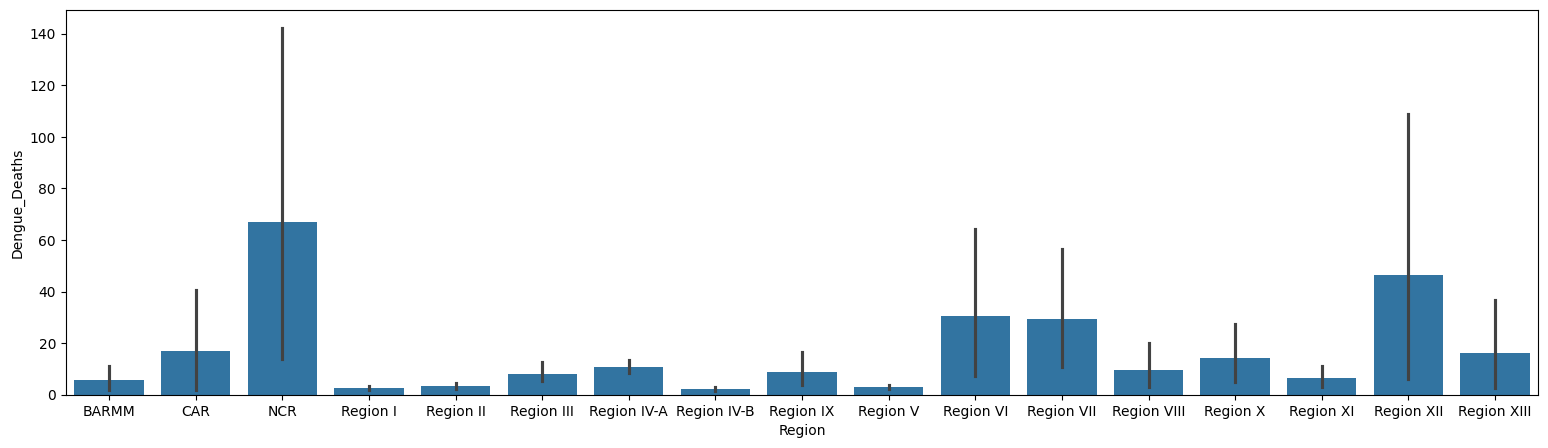

In [16]:
sns.barplot(data=dengue, x="Region", y="Dengue_Deaths")
plt.gcf().set_size_inches(19, 5)
plt.show()

<h1>Line Plot</h1>

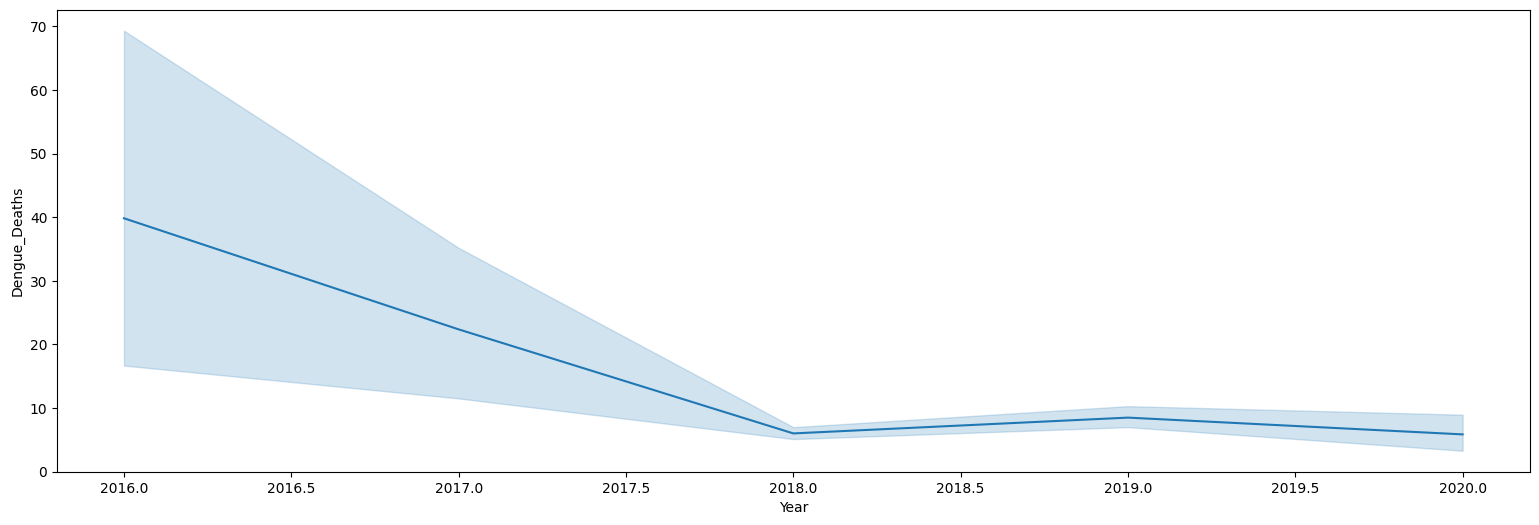

In [17]:
sns.lineplot(data=dengue, y="Dengue_Deaths", x="Year")
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>Scatter Plot</h1>

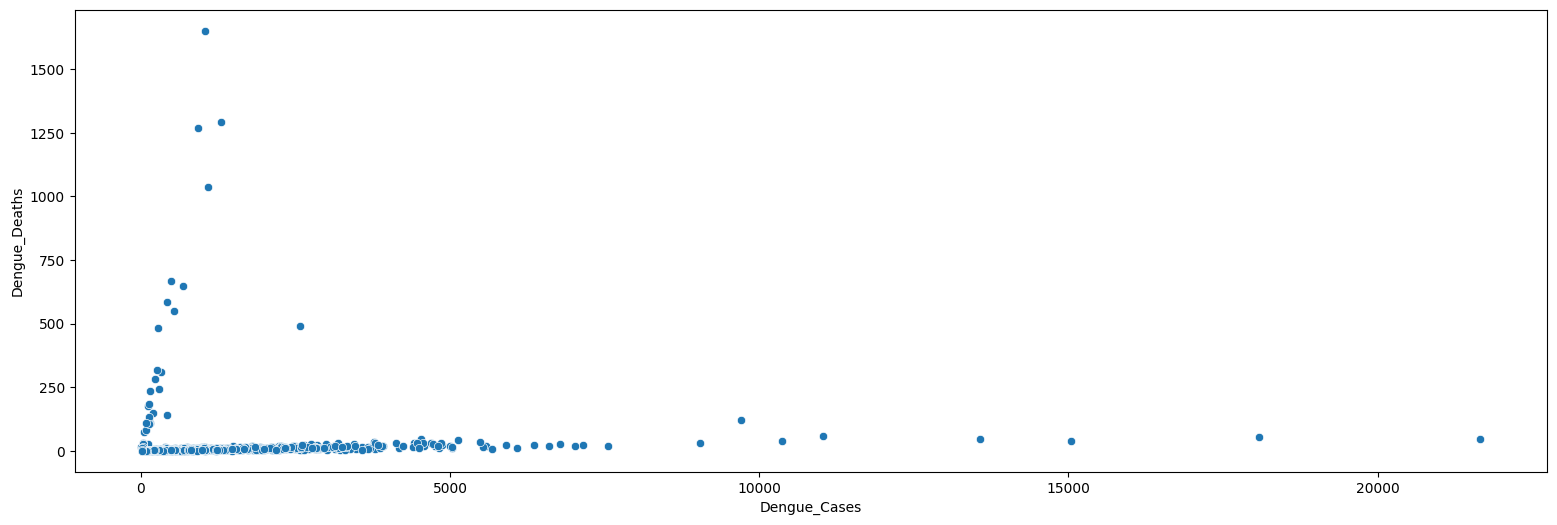

In [18]:
sns.scatterplot(data=dengue, y="Dengue_Deaths", x="Dengue_Cases")
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>Box Plot</h1>

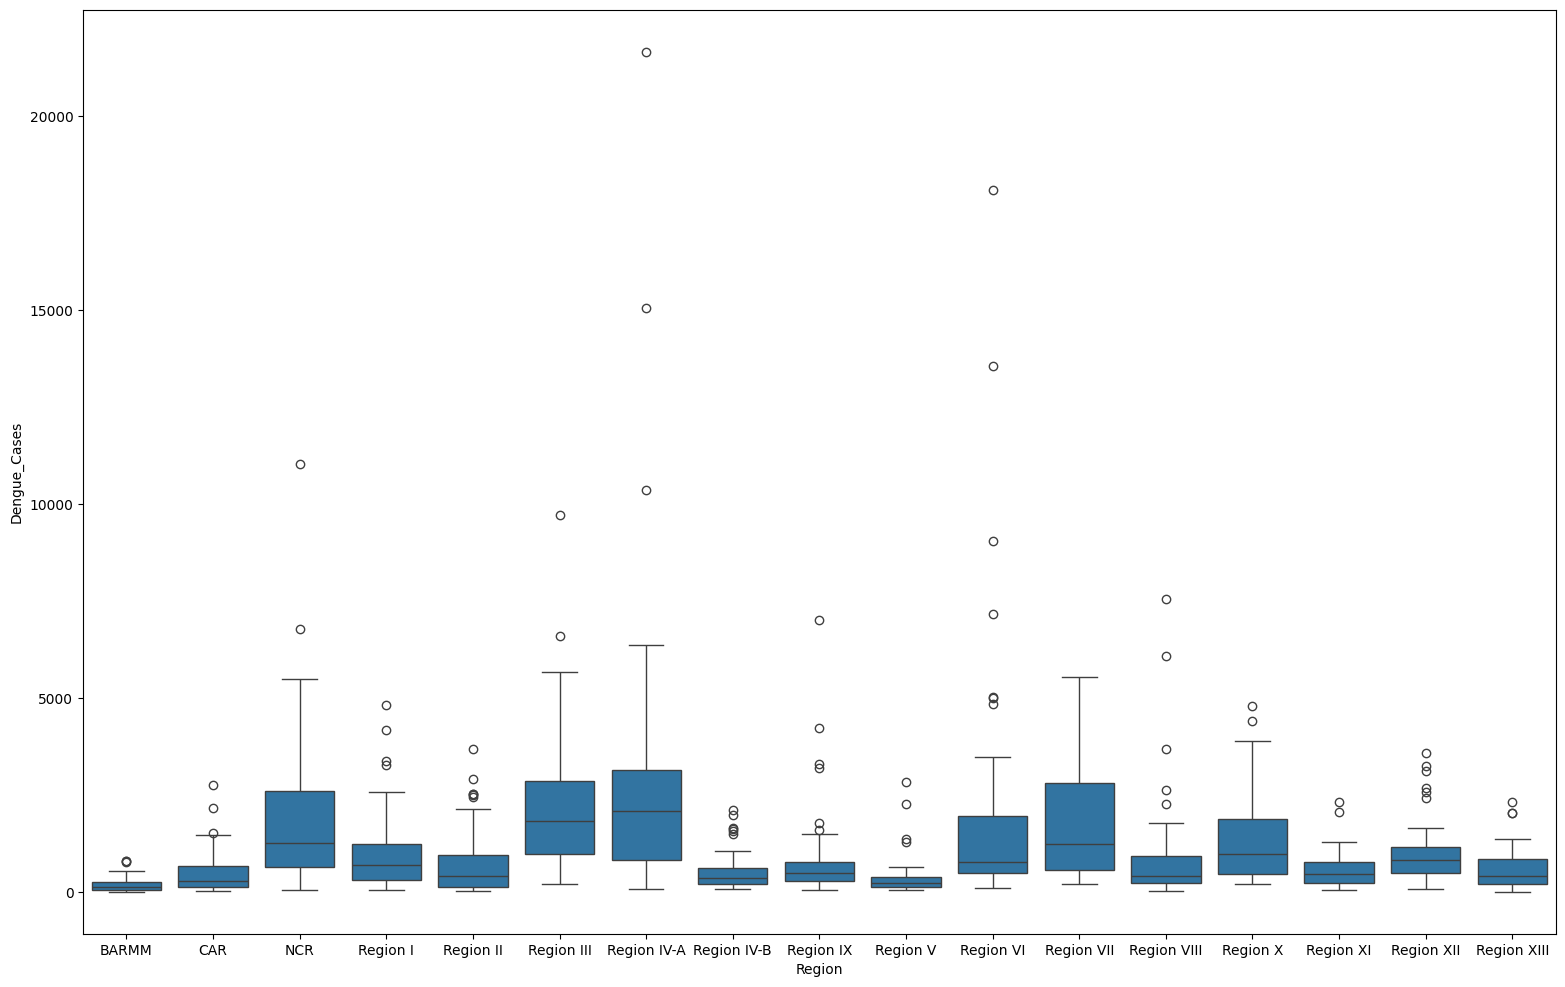

In [19]:
sns.boxplot(data=dengue, x="Region", y="Dengue_Cases")
plt.gcf().set_size_inches(19, 12)
plt.show()

In [20]:
dengue_V2  = dengue[dengue["Year"] != '2019-01-01']

In [21]:
dengue_V2

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


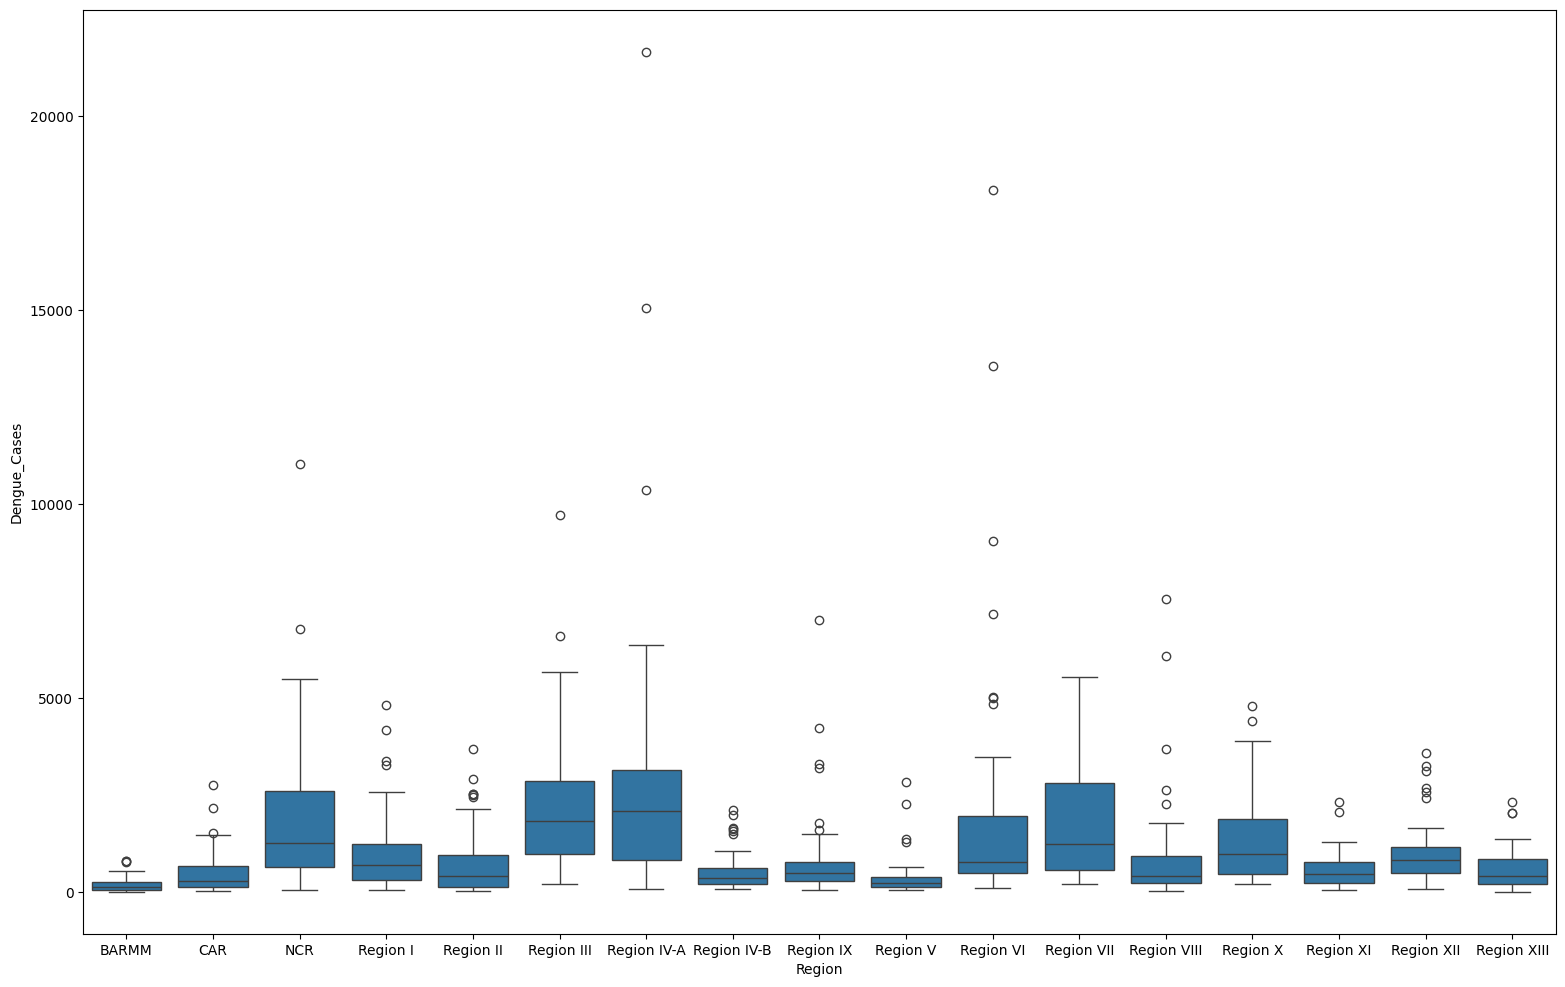

In [22]:
sns.boxplot(data=dengue_V2, x="Region", y="Dengue_Cases")
plt.gcf().set_size_inches(19, 12)
plt.show()

In [23]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Month          1020 non-null   category
 1   Year           1020 non-null   int64   
 2   Region         1020 non-null   category
 3   Dengue_Cases   1020 non-null   int64   
 4   Dengue_Deaths  1020 non-null   int64   
dtypes: category(2), int64(3)
memory usage: 27.1 KB


In [24]:
dengue.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

In [25]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h1>INSIGHTS</h1>

<h1>1. Total Dengue Cases
</h1>

Total Dengue Cases: 1147425


Text(0, 0.5, 'Cases')

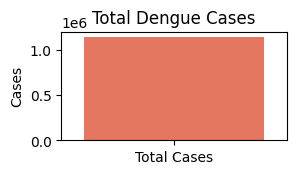

In [6]:
total_cases = dengue['Dengue_Cases'].sum()
print("Total Dengue Cases:", total_cases)

plt.subplot(3, 2, 1)
sns.barplot(x=['Total Cases'], y=[total_cases], palette='Reds')
plt.title('Total Dengue Cases')
plt.ylabel('Cases')

<h1>2. Total Dengue Deaths

</h1>

Total Dengue Deaths: 16844


Text(0, 0.5, 'Deaths')

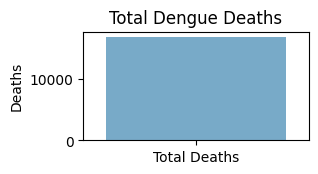

In [7]:
total_deaths = dengue['Dengue_Deaths'].sum()
print("Total Dengue Deaths:", total_deaths)

plt.subplot(3, 2, 2)
sns.barplot(x=['Total Deaths'], y=[total_deaths], palette='Blues')
plt.title('Total Dengue Deaths')
plt.ylabel('Deaths')

<h1>3. Average Monthly Cases

</h1>

Average Monthly Cases: 1124.9264705882354


Text(0, 0.5, 'Cases')

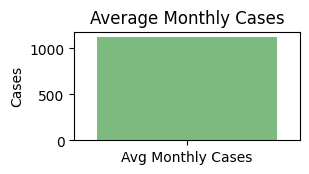

In [8]:
avg_cases = dengue['Dengue_Cases'].mean()
print("Average Monthly Cases:", avg_cases)

plt.subplot(3, 2, 3)
sns.barplot(x=['Avg Monthly Cases'], y=[avg_cases], palette='Greens')
plt.title('Average Monthly Cases')
plt.ylabel('Cases')

<h1>4. Average Monthly Deaths

</h1>

Average Monthly Deaths: 16.51372549019608


Text(0, 0.5, 'Deaths')

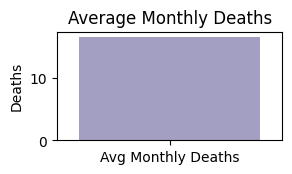

In [9]:
avg_deaths = dengue['Dengue_Deaths'].mean()
print("Average Monthly Deaths:", avg_deaths)

plt.subplot(3, 2, 4)
sns.barplot(x=['Avg Monthly Deaths'], y=[avg_deaths], palette='Purples')
plt.title('Average Monthly Deaths')
plt.ylabel('Deaths')

<h1>5. Max Monthly Cases

</h1>

Max Monthly Cases: 21658


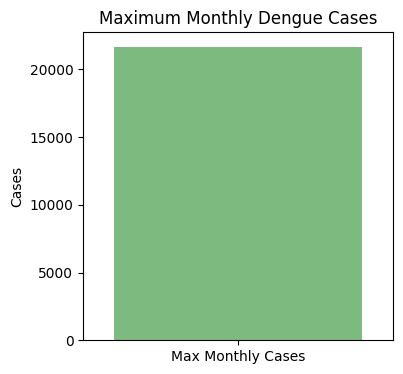

In [14]:
max_cases = dengue['Dengue_Cases'].max()
print("Max Monthly Cases:", max_cases)

plt.figure(figsize=(4, 4))
sns.barplot(x=['Max Monthly Cases'], y=[max_cases], palette='Greens')
plt.title('Maximum Monthly Dengue Cases')
plt.ylabel('Cases')
plt.show()

<h1>6. Max Monthly Deaths

</h1>

Max Monthly Deaths: 1651


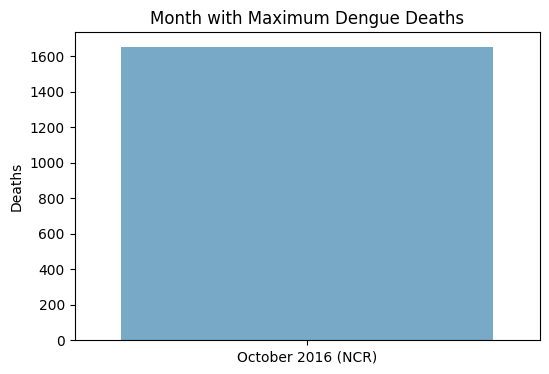

In [15]:
max_deaths = dengue['Dengue_Deaths'].max()
print("Max Monthly Deaths:", max_deaths)

max_deaths = dengue['Dengue_Deaths'].max()
max_deaths_row = dengue.loc[dengue['Dengue_Deaths'].idxmax()]
plt.figure(figsize=(6, 4))
sns.barplot(x=[f"{max_deaths_row['Month']} {int(max_deaths_row['Year'])} ({max_deaths_row['Region']})"], 
            y=[max_deaths], palette='Blues')
plt.title('Month with Maximum Dengue Deaths')
plt.ylabel('Deaths')
plt.show()

<h1>7. Month with Least Cases</h1>

Month with Least Cases:
 Month                October
Year                    2020
Region           Region XIII
Dengue_Cases              10
Dengue_Deaths             14
Name: 837, dtype: object


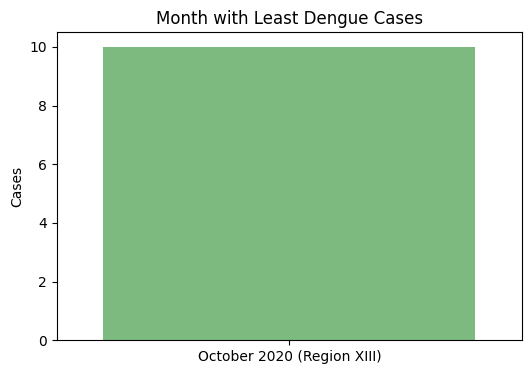

In [16]:
min_cases_row = dengue.loc[dengue['Dengue_Cases'].idxmin()]
print("Month with Least Cases:\n", min_cases_row)

min_cases_row = dengue.loc[dengue['Dengue_Cases'].idxmin()]

plt.figure(figsize=(6, 4))
sns.barplot(x=[f"{min_cases_row['Month']} {int(min_cases_row['Year'])} ({min_cases_row['Region']})"],
            y=[min_cases_row['Dengue_Cases']], palette='Greens')
plt.title('Month with Least Dengue Cases')
plt.ylabel('Cases')
plt.show()

<h1>8. Month with Least Deaths</h1>

Month with Least Deaths:
 Month            February
Year                 2016
Region           Region I
Dengue_Cases          374
Dengue_Deaths           0
Name: 1, dtype: object


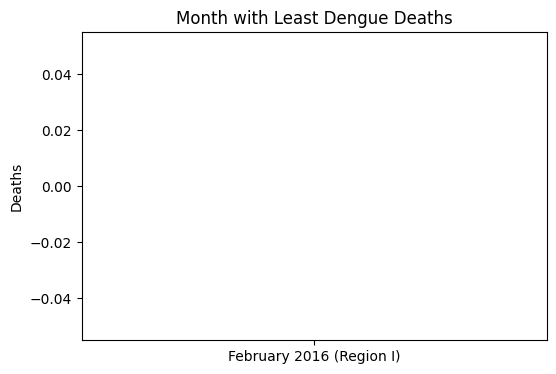

In [17]:
min_deaths_row = dengue.loc[dengue['Dengue_Deaths'].idxmin()]
print("Month with Least Deaths:\n", min_deaths_row)

min_deaths_row = dengue.loc[dengue['Dengue_Deaths'].idxmin()]

plt.figure(figsize=(6, 4))
sns.barplot(x=[f"{min_deaths_row['Month']} {int(min_deaths_row['Year'])} ({min_deaths_row['Region']})"],
            y=[min_deaths_row['Dengue_Deaths']], palette='Purples')
plt.title('Month with Least Dengue Deaths')
plt.ylabel('Deaths')
plt.show()

<h1>9. Standard Deviation of Cases</h1>

Standard Deviation of Cases: 1662.608877686575


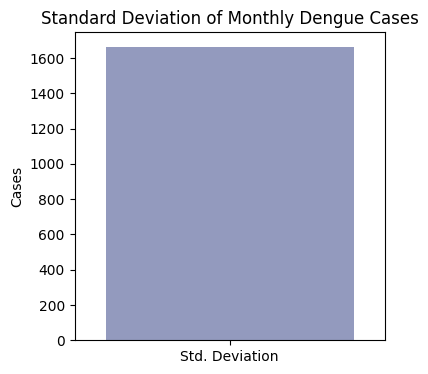

In [19]:
std_cases = dengue['Dengue_Cases'].std()
print("Standard Deviation of Cases:", std_cases)

plt.figure(figsize=(4, 4))
sns.barplot(x=['Std. Deviation'], y=[std_cases], palette='BuPu')
plt.title('Standard Deviation of Monthly Dengue Cases')
plt.ylabel('Cases')
plt.show()

<h1>10. Standard Deviation of Deaths</h1>

Standard Deviation of Deaths: 96.35821501779819


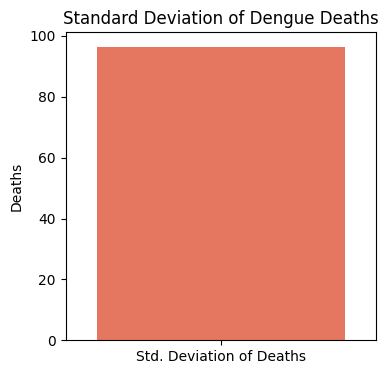

In [20]:
std_deaths = dengue['Dengue_Deaths'].std()
print("Standard Deviation of Deaths:", std_deaths)

plt.figure(figsize=(4, 4))
sns.barplot(x=['Std. Deviation of Deaths'], y=[std_deaths], palette='Reds')
plt.title('Standard Deviation of Dengue Deaths')
plt.ylabel('Deaths')
plt.show()

<h1>11.Number of Regions Affected</h1>

Regions Affected: 17


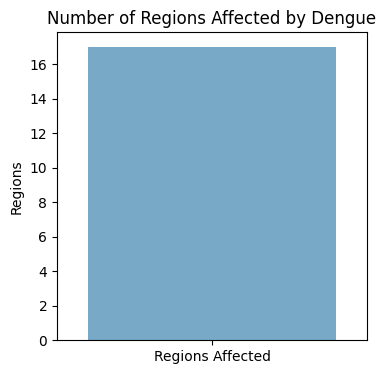

In [22]:
num_regions = dengue['Region'].nunique()
print("Regions Affected:", num_regions)

plt.figure(figsize=(4, 4))
sns.barplot(x=['Regions Affected'], y=[num_regions], palette='Blues')
plt.title('Number of Regions Affected by Dengue')
plt.ylabel('Regions')
plt.show()

<h1>12. Number of Years Covered</h1>

Years Covered: 5


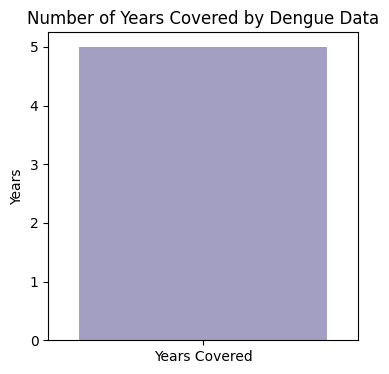

In [23]:
num_years = dengue['Year'].nunique()
print("Years Covered:", num_years)

plt.figure(figsize=(4, 4))
sns.barplot(x=['Years Covered'], y=[num_years], palette='Purples')
plt.title('Number of Years Covered by Dengue Data')
plt.ylabel('Years')
plt.show()

<h1> 13. Region with Highest Average Monthly Cases</h1>

Region with Highest Avg Monthly Cases: Region IV-A


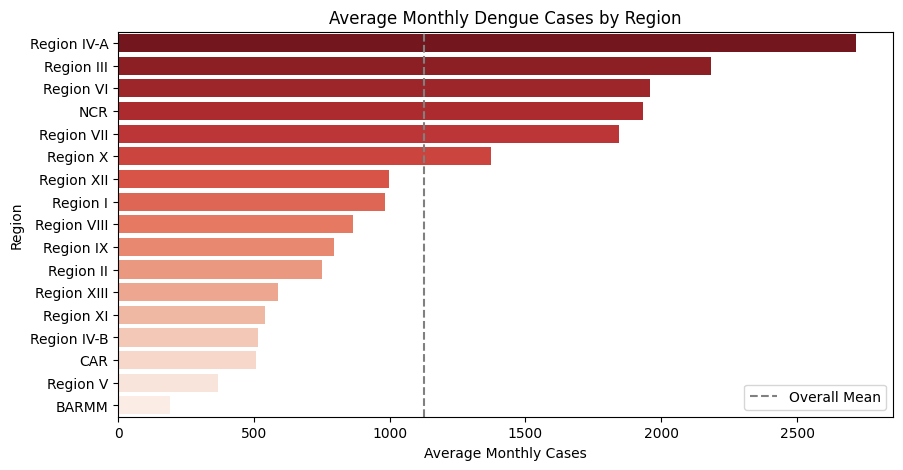

In [12]:
avg_cases_by_region = dengue.groupby('Region')['Dengue_Cases'].mean()
region_highest_avg = avg_cases_by_region.idxmax()
print("Region with Highest Avg Monthly Cases:", region_highest_avg)

avg_cases_by_region = dengue.groupby('Region')['Dengue_Cases'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_cases_by_region.values, y=avg_cases_by_region.index, palette='Reds_r')
plt.title('Average Monthly Dengue Cases by Region')
plt.xlabel('Average Monthly Cases')
plt.ylabel('Region')
plt.axvline(avg_cases_by_region.mean(), color='gray', linestyle='--', label='Overall Mean')
plt.legend()
plt.show()

<h1>14. Region with Most Total Deaths</h1>

Region with Most Total Deaths: NCR


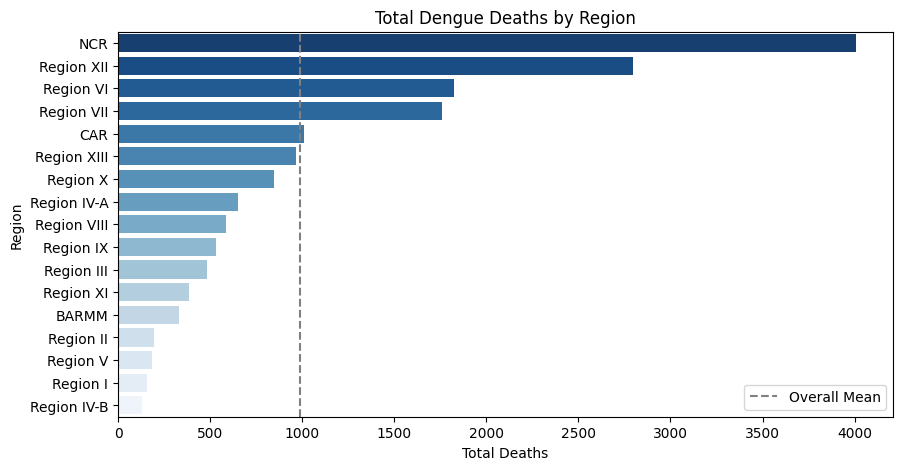

In [11]:
total_deaths_by_region = dengue.groupby('Region')['Dengue_Deaths'].sum()
region_most_deaths = total_deaths_by_region.idxmax()
print("Region with Most Total Deaths:", region_most_deaths)

total_deaths_by_region = dengue.groupby('Region')['Dengue_Deaths'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=total_deaths_by_region.values, y=total_deaths_by_region.index, palette='Blues_r')
plt.title('Total Dengue Deaths by Region')
plt.xlabel('Total Deaths')
plt.ylabel('Region')
plt.axvline(total_deaths_by_region.mean(), color='gray', linestyle='--', label='Overall Mean')
plt.legend()
plt.show()

<h1>15.Top 5 Months with Most Deaths</h1>

Top 5 Months with Most Deaths:
          Month  Year      Region  Dengue_Cases  Dengue_Deaths
849    October  2016         NCR          1033           1651
848  September  2016         NCR          1291           1291
729    October  2016  Region XII           928           1270
728  September  2016  Region XII          1083           1036
381    October  2017   Region VI           488            668


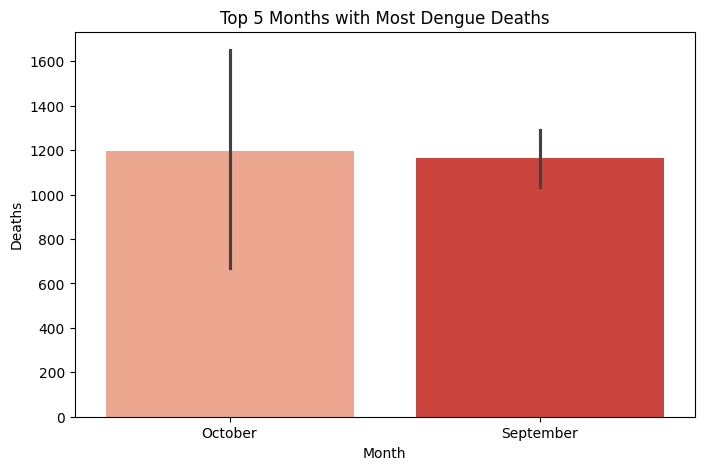

In [24]:
top5_deaths = dengue.sort_values('Dengue_Deaths', ascending=False).head(5)
print("Top 5 Months with Most Deaths:\n", top5_deaths)

top5_deaths = dengue.sort_values('Dengue_Deaths', ascending=False).head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x='Month', y='Dengue_Deaths', data=top5_deaths, palette='Reds')
plt.title('Top 5 Months with Most Dengue Deaths')
plt.xlabel('Month')
plt.ylabel('Deaths')
plt.show()

<h1>16. Top 5 Months with Most Cases</h1>

Top 5 Months with Most Cases:
          Month  Year       Region  Dengue_Cases  Dengue_Deaths
224  September  2019  Region IV-A         21658             48
403     August  2019    Region VI         18090             54
223     August  2019  Region IV-A         15047             39
402       July  2019    Region VI         13564             48
884  September  2019          NCR         11033             58


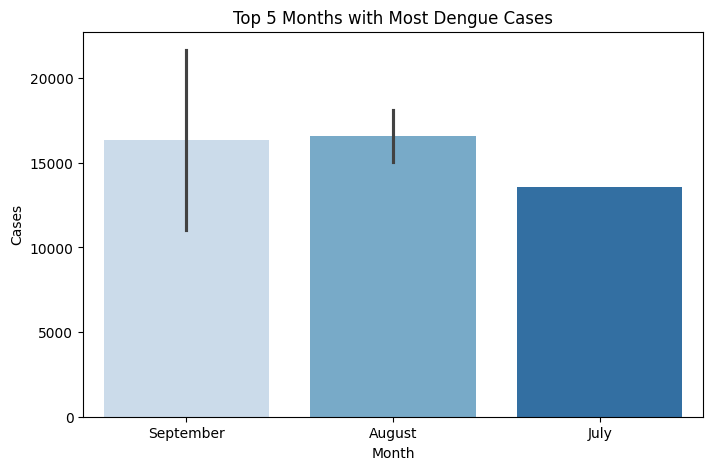

In [25]:
top5_cases = dengue.sort_values('Dengue_Cases', ascending=False).head(5)
print("Top 5 Months with Most Cases:\n", top5_cases)

top5_cases = dengue.sort_values('Dengue_Cases', ascending=False).head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x='Month', y='Dengue_Cases', data=top5_cases, palette='Blues')
plt.title('Top 5 Months with Most Dengue Cases')
plt.xlabel('Month')
plt.ylabel('Cases')
plt.show()

<h1>17.Overall Death Rate (%)</h1>

Death Rate (%): 1.47


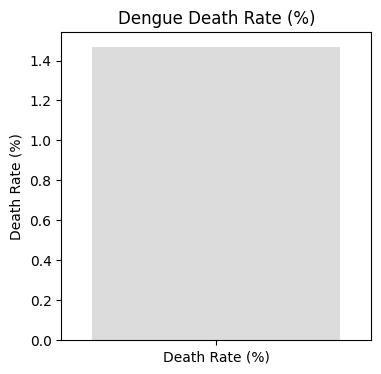

In [26]:
death_rate = (total_deaths / total_cases) * 100
print("Death Rate (%):", round(death_rate, 2))

death_rate = (total_deaths / total_cases) * 100


plt.figure(figsize=(4, 4))
sns.barplot(x=['Death Rate (%)'], y=[death_rate], palette='coolwarm')
plt.title('Dengue Death Rate (%)')
plt.ylabel('Death Rate (%)')
plt.show()

<h1>18.Cases Per Year</h1>

Cases Per Year:
 Year
2016    209544
2017    154155
2018    250783
2019    441902
2020     91041
Name: Dengue_Cases, dtype: int64


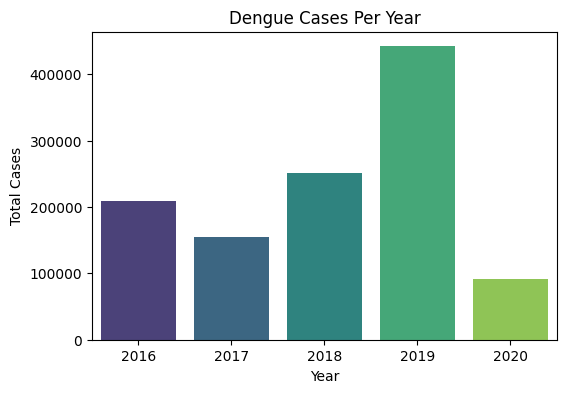

In [27]:
cases_per_year = dengue.groupby('Year')['Dengue_Cases'].sum()
print("Cases Per Year:\n", cases_per_year)

cases_per_year = dengue.groupby('Year')['Dengue_Cases'].sum()


plt.figure(figsize=(6, 4))
sns.barplot(x=cases_per_year.index, y=cases_per_year.values, palette='viridis')
plt.title('Dengue Cases Per Year')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.show()

<h1>19.Deaths Per Year</h1>

Deaths Per Year:
 Year
2016    8127
2017    4563
2018    1226
2019    1733
2020    1195
Name: Dengue_Deaths, dtype: int64


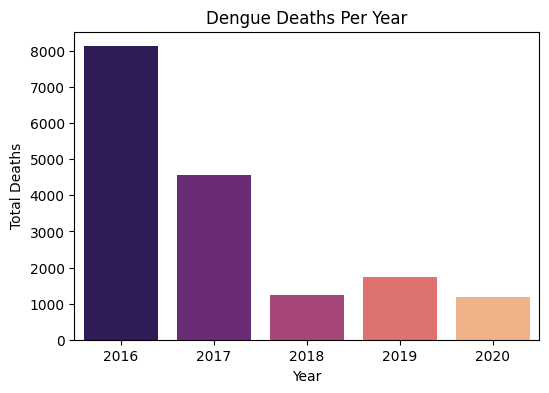

In [28]:
deaths_per_year = dengue.groupby('Year')['Dengue_Deaths'].sum()
print("Deaths Per Year:\n", deaths_per_year)

deaths_per_year = dengue.groupby('Year')['Dengue_Deaths'].sum()


plt.figure(figsize=(6, 4))
sns.barplot(x=deaths_per_year.index, y=deaths_per_year.values, palette='magma')
plt.title('Dengue Deaths Per Year')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.show()

<h1>20.Average Monthly Cases by Month (Seasonality)</h1>

Monthly Average Cases:
 Month
April         382.447059
August       2206.517647
December     1040.364706
February      915.305882
January       992.094118
July         1626.376471
June          683.647059
March         677.364706
May           381.023529
November     1116.470588
October      1384.058824
September    2093.447059
Name: Dengue_Cases, dtype: float64


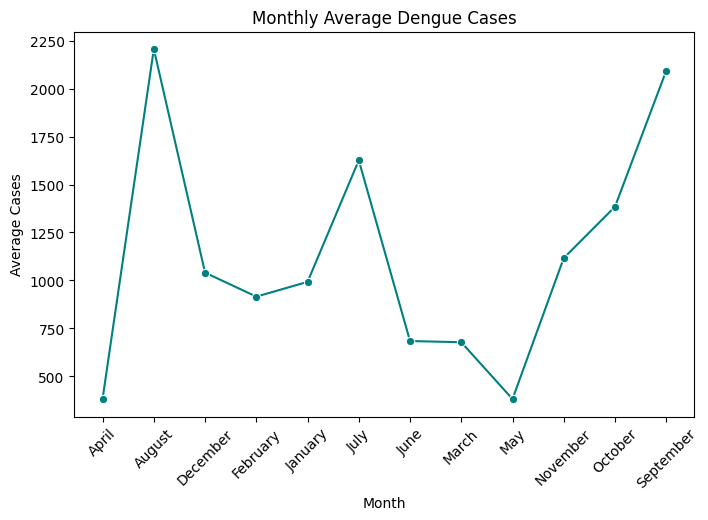

In [29]:
monthly_trend = dengue.groupby('Month')['Dengue_Cases'].mean()
print("Monthly Average Cases:\n", monthly_trend)

monthly_trend = dengue.groupby('Month')['Dengue_Cases'].mean()


plt.figure(figsize=(8, 5))
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker='o', color='teal')
plt.title('Monthly Average Dengue Cases')
plt.xlabel('Month')
plt.ylabel('Average Cases')
plt.xticks(rotation=45)  
plt.show()

<h1>REGION IV 4A - DENGUE CASES</h1>

In [38]:
region4 = dengue[dengue['Region'] == "Region IV-A"]

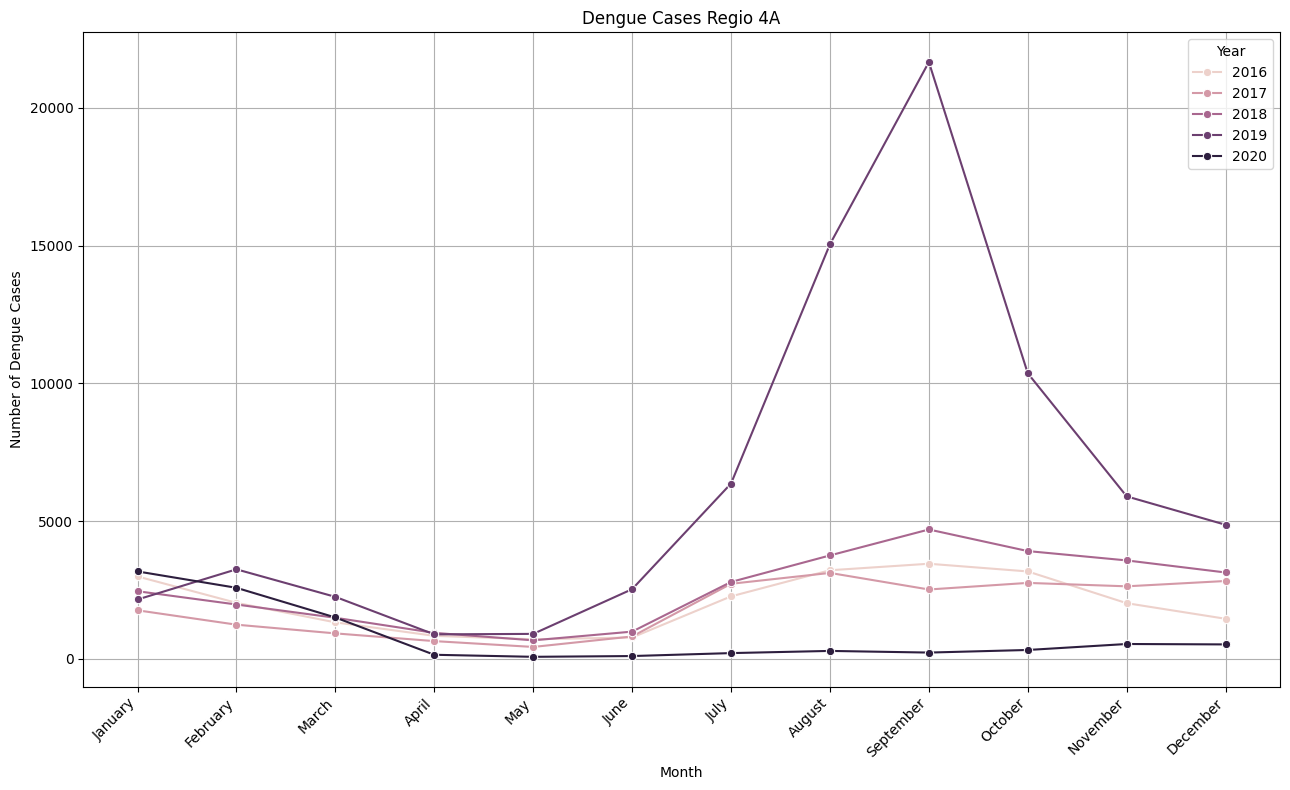

In [44]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

sns.lineplot(data=region4, y="Dengue_Cases", x="Month", hue="Year", marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('Dengue Cases Regio 4A')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

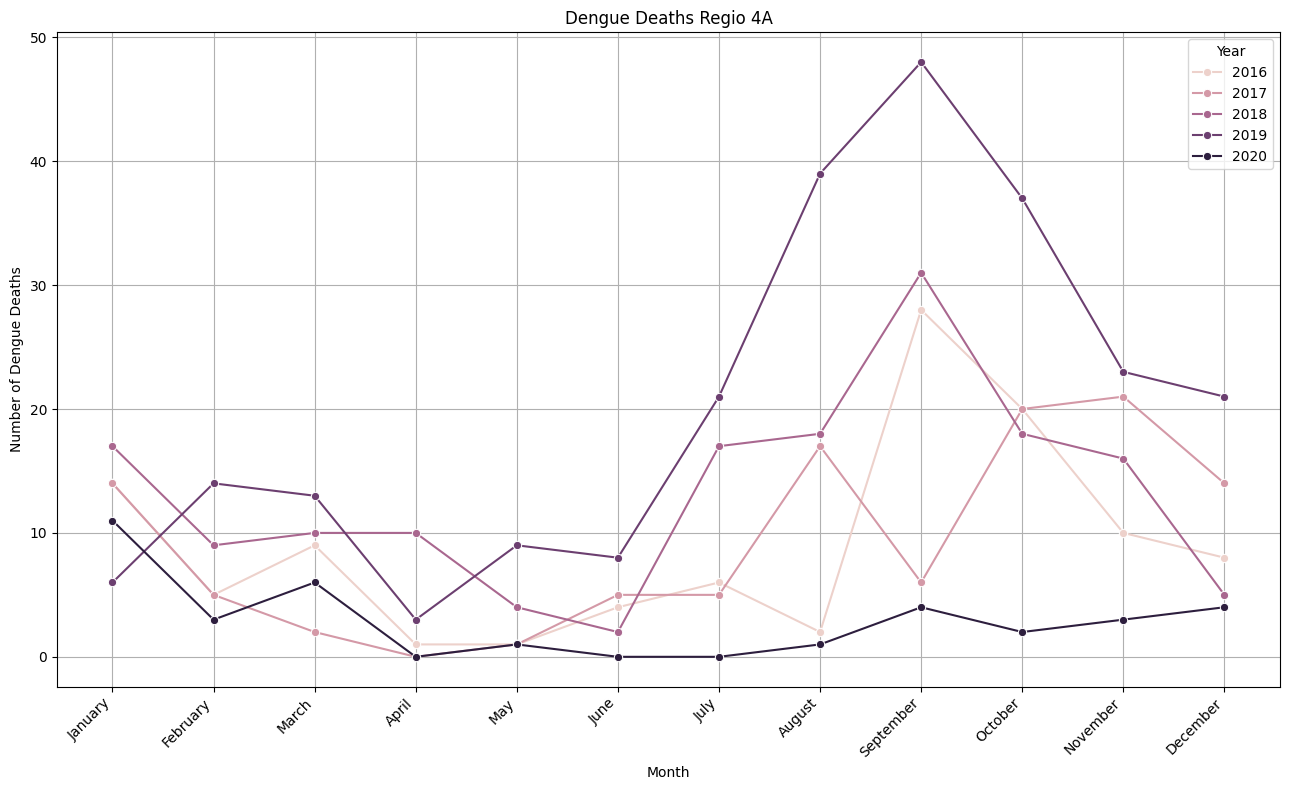

In [43]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

sns.lineplot(data=region4, y="Dengue_Deaths", x="Month", hue="Year", marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('Dengue Deaths Regio 4A')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Deaths')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
unique_regions = dengue['Region'].unique()